<a href="https://colab.research.google.com/github/TheLawal24/Breast-Cancer-Detection-with-Deep-Learning/blob/main/Airplane_Fatality_and_Crashes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install all the required libraries
!pip install --root-user-action=ignore opendatasets geopy pycountry geopandas opendatasets folium mapclassify --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 12.2 MB/s eta 0:00:00


In [2]:
# Import all the required libraries
import numpy as np
import pandas as pd
import opendatasets as od
import os
import math
import seaborn as sns
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import ConnectionPatch
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mapclassify
import requests
import geopy
import geopandas
import pycountry
import re
import folium
from sklearn.impute import SimpleImputer
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

Data Cleaning and Preparation

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: filling with mean or mode, or dropping)
df['Fatalities'] = df['Fatalities'].fillna(df['Fatalities'].mean())
df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB
None
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228

In [4]:
# read & load the dataset into pandas dataframe
#crashesDataframe = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

crashesDataframe = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

# check the no. of columns & rows
print('The Airplane Crash Dataset contains {:,d} rows & {} columns'.format(crashesDataframe.shape[0], crashesDataframe.shape[1]))


The Airplane Crash Dataset contains 5,268 rows & 13 columns


In [5]:
# convert Date into Datetime Feature
crashesDataframe.Date = pd.to_datetime(crashesDataframe.Date)

Load Data Frame

In [9]:
crashesDataframe

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


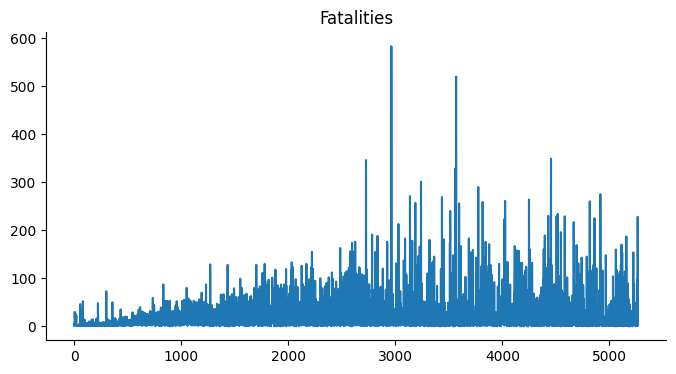

In [10]:
# @title Fatalities

from matplotlib import pyplot as plt
crashesDataframe['Fatalities'].plot(kind='line', figsize=(8, 4), title='Fatalities')
plt.gca().spines[['top', 'right']].set_visible(False)

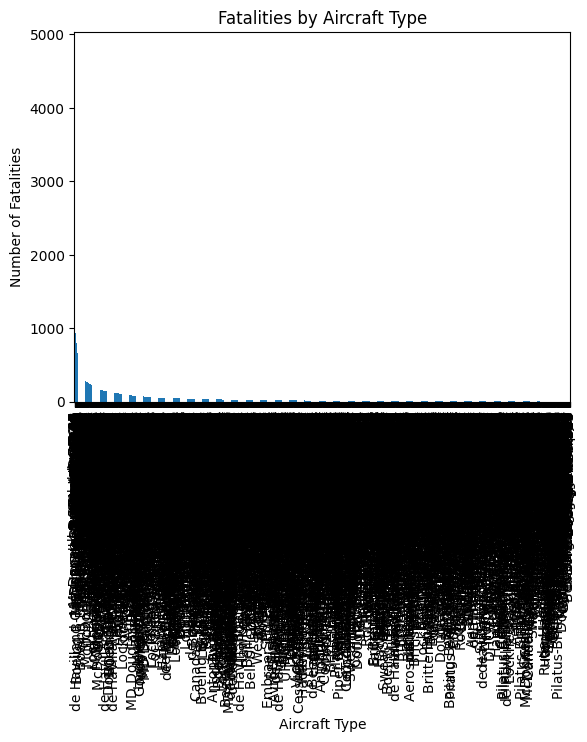

In [11]:
# @title Fatalities by Aircraft Type

import matplotlib.pyplot as plt

# Create the bar chart
fatalities_by_type = crashesDataframe.groupby('Type')['Fatalities'].sum().sort_values(ascending=False)
fatalities_by_type.plot(kind='bar')

# Label the axes
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Fatalities')

# Add a title
_ = plt.title('Fatalities by Aircraft Type')


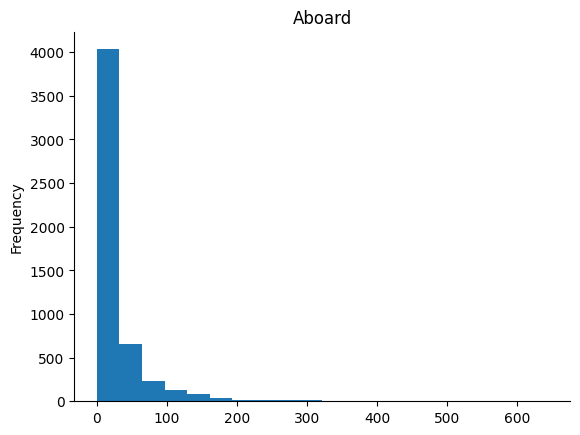

In [14]:
# @title Aboard

from matplotlib import pyplot as plt
crashesDataframe['Aboard'].plot(kind='hist', bins=20, title='Aboard')
plt.gca().spines[['top', 'right',]].set_visible(False)

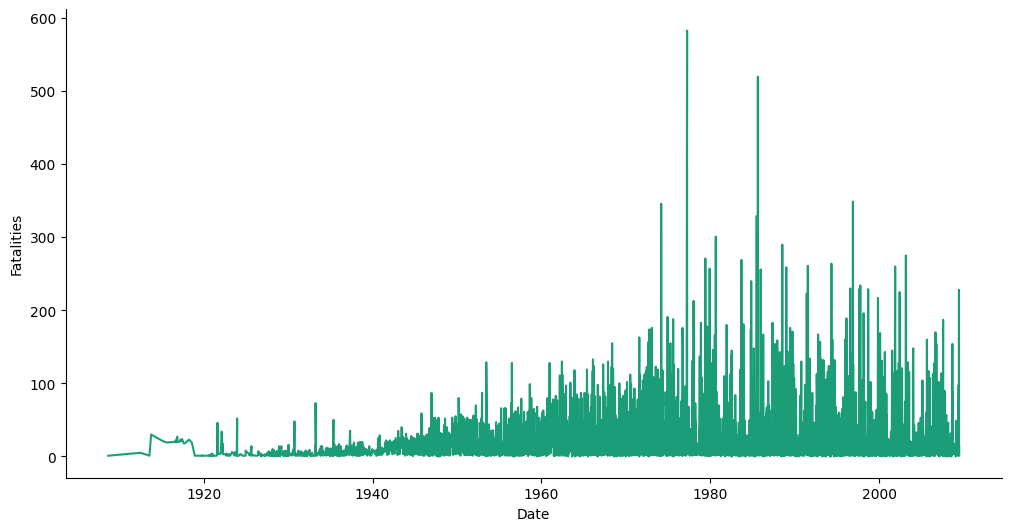

In [ ]:
# @title Date vs Fatalities

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Fatalities']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = crashesDataframe.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Fatalities')

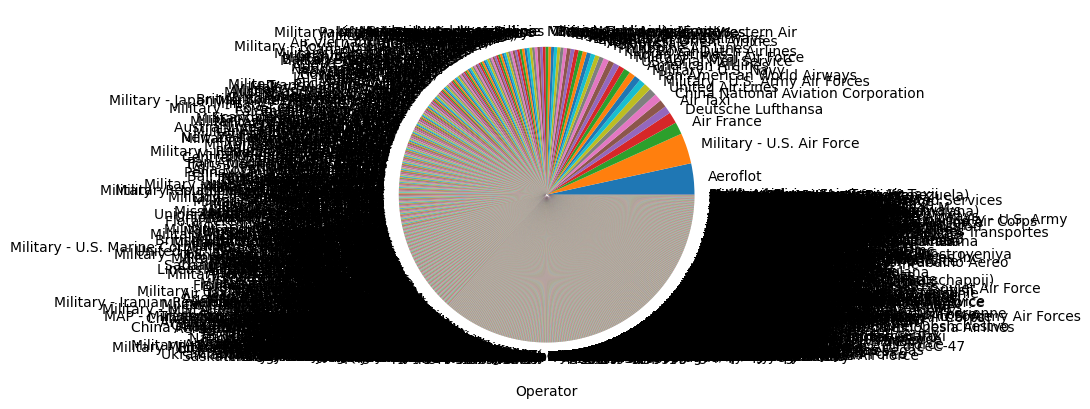

In [ ]:
# @title Crashes by Operator

import matplotlib.pyplot as plt
crashesDataframe['Operator'].value_counts().plot(kind='pie')
plt.xlabel('Operator')
_ = plt.ylabel('Number of Crashes')

In [12]:
crashesDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5268 non-null   datetime64[ns]
 1   Time          3049 non-null   object        
 2   Location      5248 non-null   object        
 3   Operator      5250 non-null   object        
 4   Flight #      1069 non-null   object        
 5   Route         3561 non-null   object        
 6   Type          5241 non-null   object        
 7   Registration  4933 non-null   object        
 8   cn/In         4040 non-null   object        
 9   Aboard        5246 non-null   float64       
 10  Fatalities    5256 non-null   float64       
 11  Ground        5246 non-null   float64       
 12  Summary       4878 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 535.2+ KB


Stattistical Analysis

In [6]:
ImputedValuesCrashesDataframe = crashesDataframe.copy()
numericData = ImputedValuesCrashesDataframe.select_dtypes(include=np.number).columns.tolist()
missingCounts = crashesDataframe[numericData].isna().sum().sort_values(ascending=False)
missingCounts[missingCounts > 0]

Aboard        22
Ground        22
Fatalities    12
dtype: int64

In [15]:
#Create the imputer
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(ImputedValuesCrashesDataframe[numericData])
ImputedValuesCrashesDataframe[numericData] = imputer.transform(ImputedValuesCrashesDataframe[numericData])



Yearly Trends in Crashes

Analyzing the number of crashes per year to identify trends over time

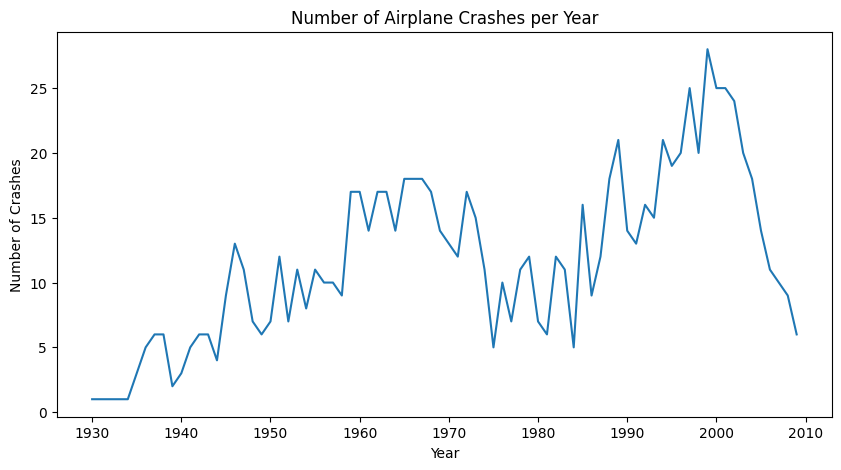

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract the year from the date
df['Year'] = df['Date'].dt.year

# Group by year and count crashes
crashes_per_year = df.groupby('Year').size()

# Plot the number of crashes per year
plt.figure(figsize=(10, 5))
plt.plot(crashes_per_year)
plt.title('Number of Airplane Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()


Analysis of Fatalities Over Time

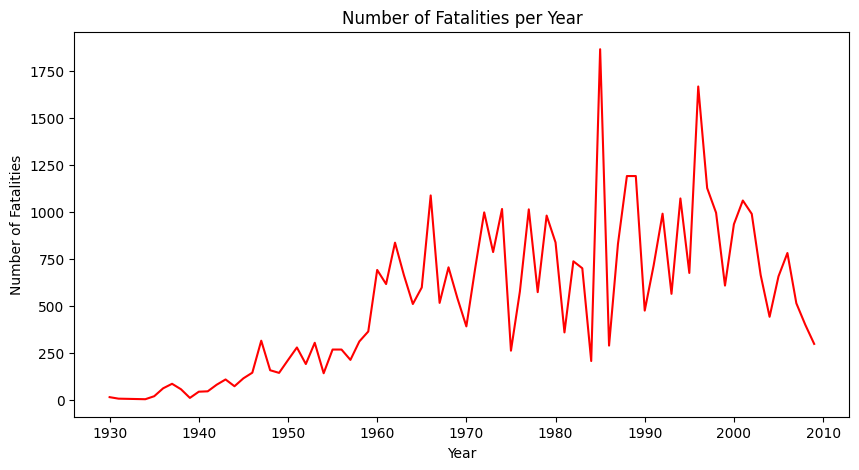

In [ ]:
# Group by year and sum fatalities
fatalities_per_year = df.groupby('Year')['Fatalities'].sum()

# Plot the number of fatalities per year
plt.figure(figsize=(10, 5))
plt.plot(fatalities_per_year, color='red')
plt.title('Number of Fatalities per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.show()


Crashes by Aircraft Type

now, we examine which aircraft types are most frequently involved in crashes.

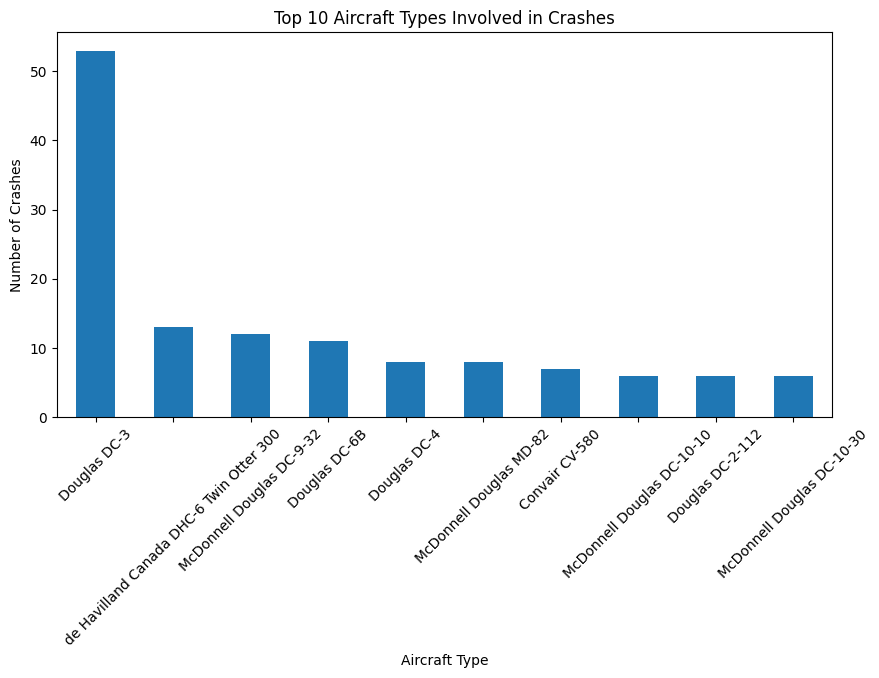

In [ ]:
# Group by aircraft type and count crashes
crashes_by_type = df['Type'].value_counts().head(10)

# Plot the top 10 aircraft types involved in crashes
plt.figure(figsize=(10, 5))
crashes_by_type.plot(kind='bar')
plt.title('Top 10 Aircraft Types Involved in Crashes')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()


Analyzing the primary Causes of Crashes


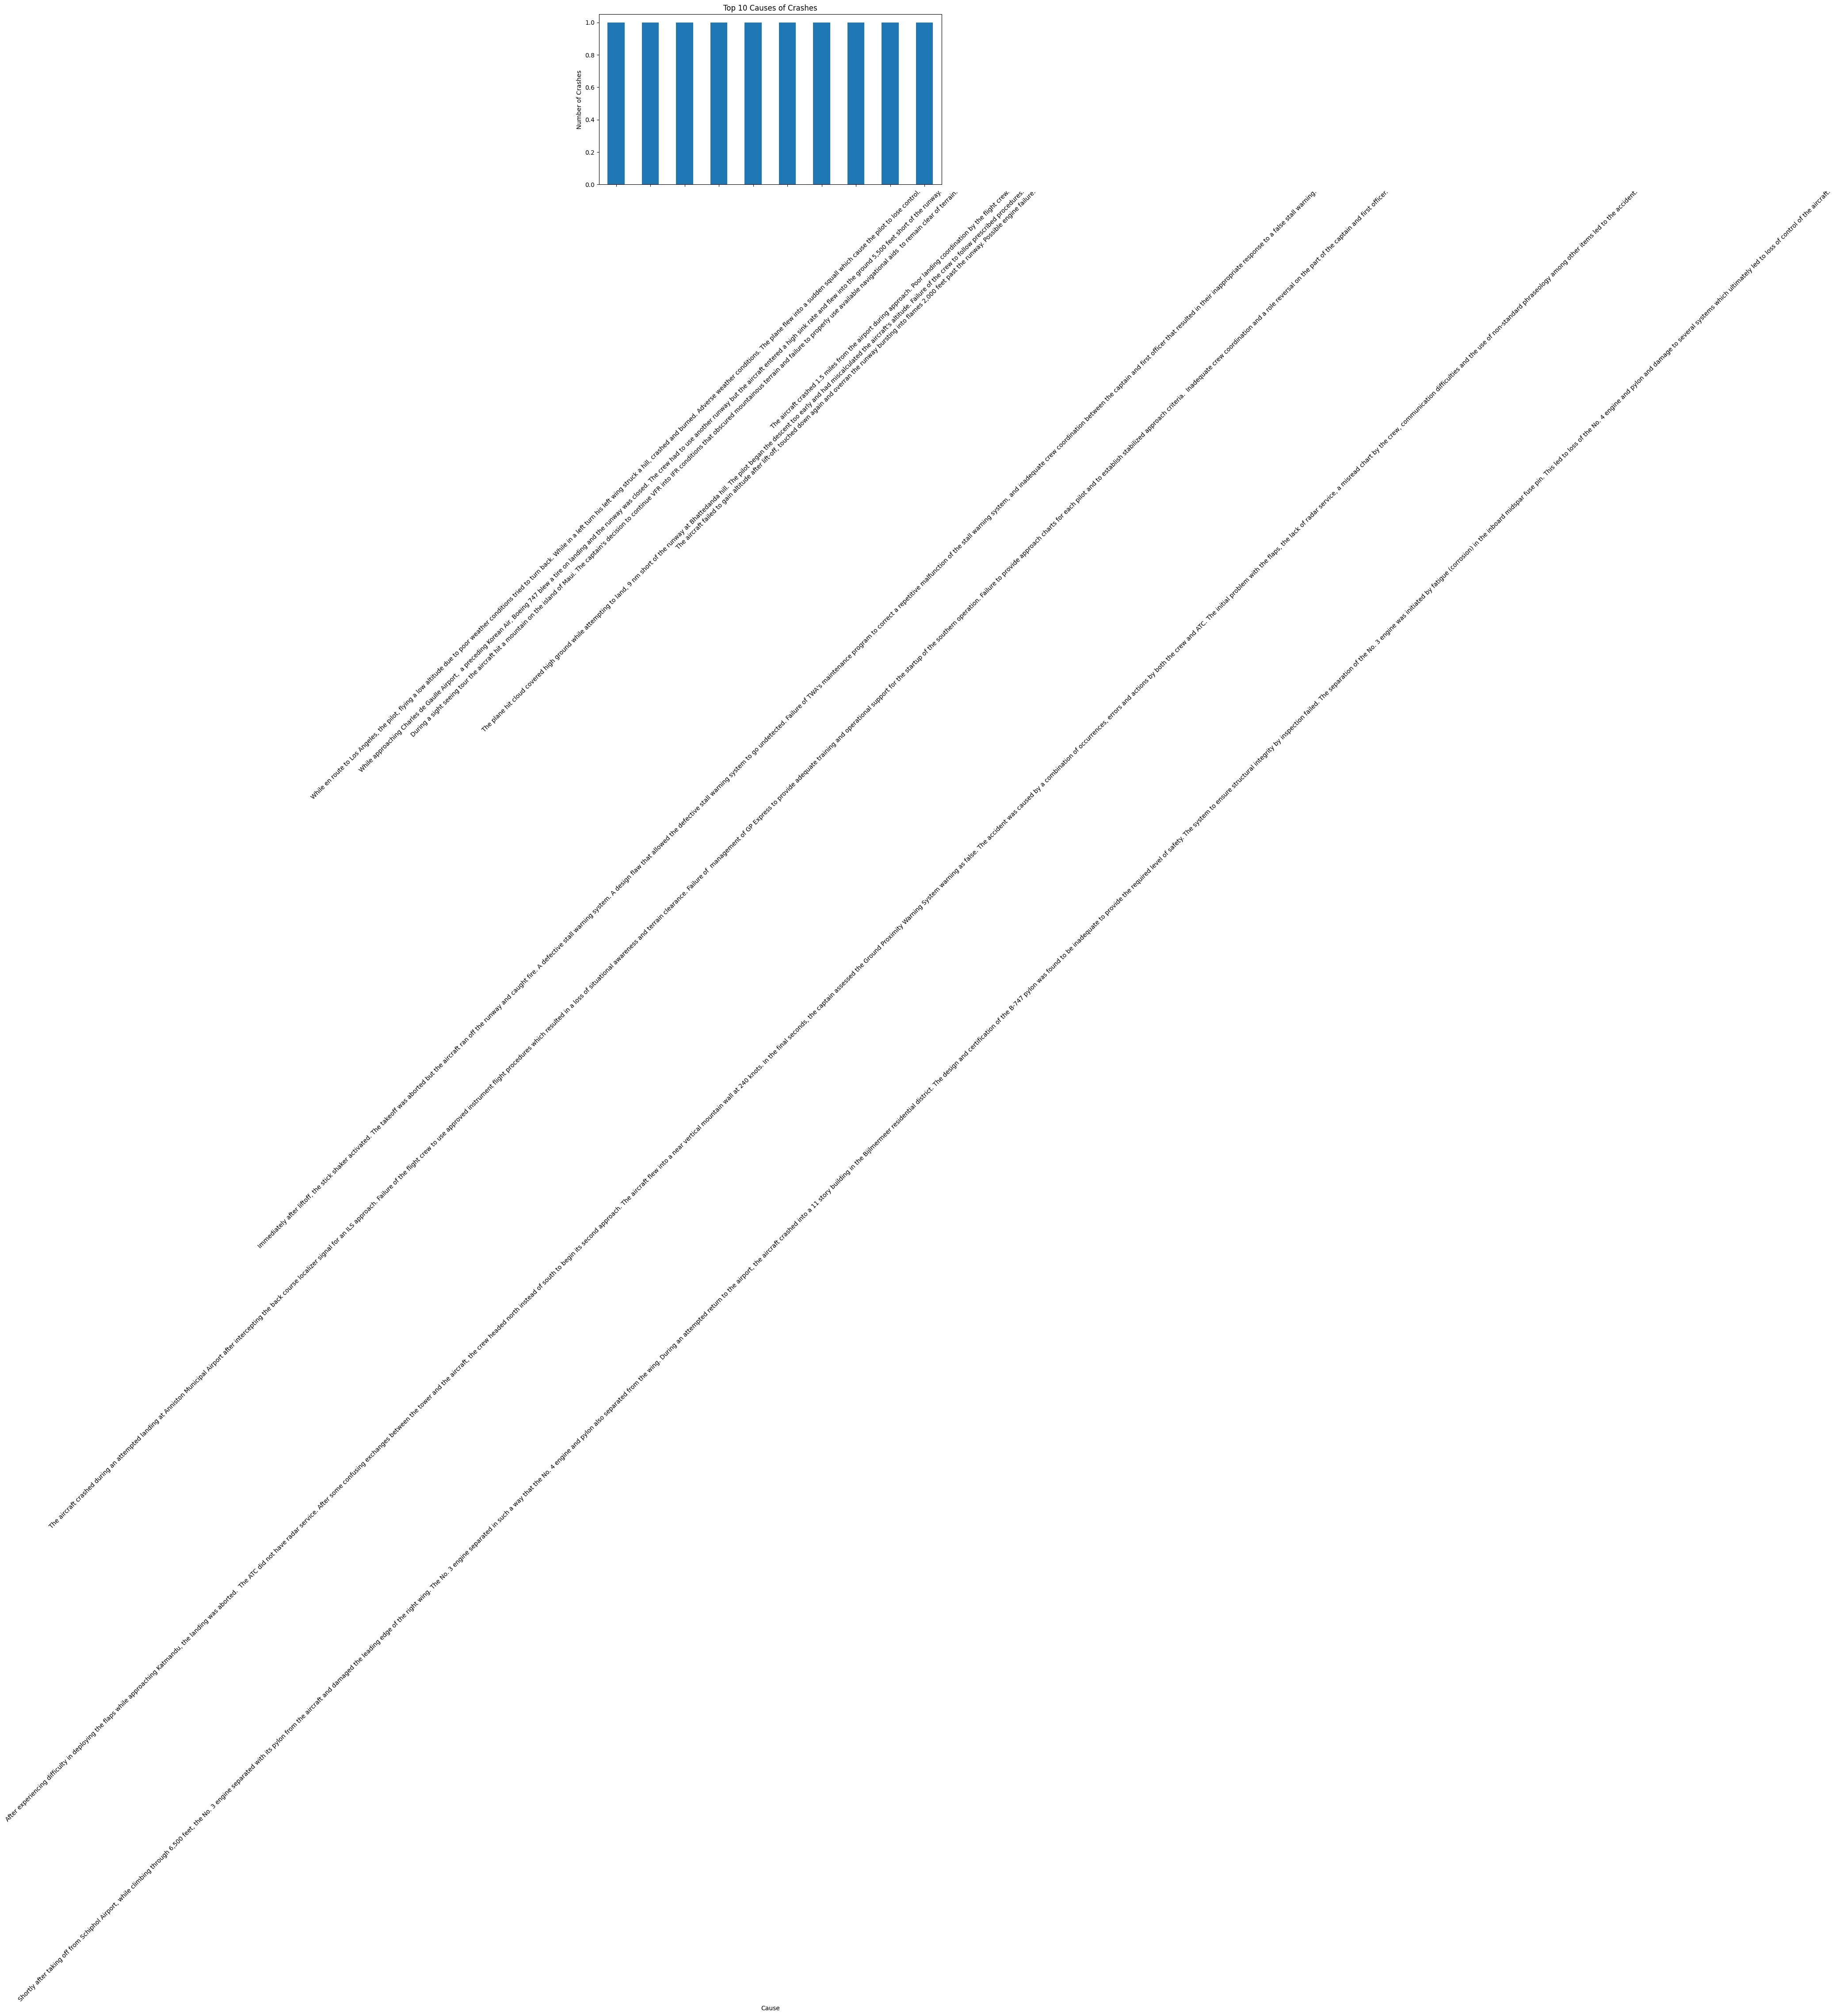

In [ ]:
# Group by cause and count crashes
causes_of_crashes = df['Summary'].value_counts().head(10)

# Plot the top 10 causes of crashes
plt.figure(figsize=(10, 5))
causes_of_crashes.plot(kind='bar')
plt.title('Top 10 Causes of Crashes')
plt.xlabel('Cause')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()


In [17]:
import folium

# Create a map centered around the mean latitude and longitude
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)

# Add points to the map
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Location']).add_to(map)

# Save map to an HTML file
map.save('crashes_map.html')


KeyError: 'Latitude'

In [18]:
pip install geopy


In [ ]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Load the dataset
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

# Create a rate limiter to avoid hitting the API rate limit
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Apply geocoding to the 'Location' column to get latitude and longitude
df['location'] = df['Location'].apply(geocode)
df['latitude'] = df['location'].apply(lambda loc: loc.latitude if loc else None)
df['longitude'] = df['location'].apply(lambda loc: loc.longitude if loc else None)

# Drop rows where geocoding failed
df = df.dropna(subset=['latitude', 'longitude'])

# Create a map centered around the mean latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=2)

# Add points to the map
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['Location']).add_to(map)

# Save map to an HTML file
map.save('crashes_map.html')


Streaming output truncated to the last 5000 lines.
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests/adapters.py", line 519, in send
    raise ConnectionError(e, request=request)
requests.exceptions.ConnectionError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Willington%2C+Connecticut&format=json&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7c977841fc70>: Failed to establish a new connection: [Errno 111] Connection refused'))

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/geopy/extra/rate_limiter.py", line 274, in __call__
    res = self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/geopy/geocoders/nominatim.py", line 297, in geocode
    return self._call_geocoder(url, callback, timeout=timeout)
  File "/usr

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
